# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

 
I have selected the No-show appointment dataset and we will be delving in to this data to understand what factors affect whether or not a patient will show up for their scheduled appointment or not. This dataset is collected from Brazilian patients and has 14 total columns and are described as:

**PatientID**: This is the unique identifier for each patient.  
**AppointmentID:** This is the unique identifier for each separate appointment.  
**Gender:** Whether the patient is Male or Female.  
**ScheduledDay:** The day the appointment was actually scheduled.  
**AppointmentDay:** The day the appointment actually took place.  
**Age:** The age of the patient.  
**Neighbourhood:** The neighborhood in Brazil that the appointment/office is located.  
**Scholarship:** If patient is enrolled in the Brazilian welfare program. 0 means no and 1 means yes.  
**Hipertension:** If patient has hypertensions. 0 means no and 1 means yes.  
**Diabetes:** If patient has diabetes. 0 means no and 1 means yes.  
**Alcoholism:** If patient has alcoholism. 0 means no and 1 means yes.  
**Handcap:** If patient is handicapped. 0 means no and 1 means yes.  
**SMS_received:** If the patient received a SMS text message confirming their appointment.  
**No-show:** If the patient showed up to their appointment. This will show YES if the patient did not show up and NO if they did show up.   Important distinction here.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline


In [36]:
 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

# Loading the No Show Appointment Database

In [37]:
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')


In [38]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Preview the data and notice right away that PatientID has some extremely large and impracticle number scheme. Also good to point out that this dataset involves both adults and children which will good to pay attention to as we work through the data.

In [39]:
df.shape

(110527, 14)

Getting a quick look at how large the data set is. 110527 patients and 14 columns total.

In [40]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here we get some useful statistics on our data. Some useful information I can see that are going to be useful for our investigation is the mean age of our patient, if they have an ongoing ailment, and if they received a SMS.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Some useful information regarding how our data is defined in our code. It looks like there is no missing data from our dataset, so we can move on to see what data is relevant for our investigation at hand.


### Data Cleaning
 

In [42]:
sum(df.duplicated())

0

Here is a quick check to see if we have any duplicated data that needs to be dropped. Since there is 0, we can just move on to our next step.

In [43]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

Here we will drop both PatientID and AppointmentID because we are trying to figure out the factors that influence whether or not a patient made it to their appointment. These columns do not influence that in anyway so they will be removed from our dataset from here.

In [44]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Confirming that our respective columns were dropped, which they were. This dataset was already pretty clean and I see potential in all the other columns as correlation as to why patients miss their appointments so we will move on.

In [45]:
df.rename(columns = {'No-show':'No_show'}, inplace = True)

Using a - like in No-show is not proper format. Using the above command, I have renamed No-show to No_show.

In [46]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Confirming that No-show has been changed to No_show

In [47]:
no_show_total = sum(df.No_show == 'Yes')
patients = 110527

Seeing how many total no shows total there are for the dataset for future reference and setting it a variable for easy access. Also setting total patients to a variable for easy access later on.

<a id='eda'></a>
## Exploratory Data Analysis

### Single Variable Analysis

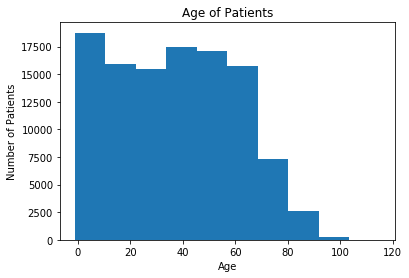

In [48]:
df['Age'].plot.hist()
plt.xlabel('Age')
plt.ylabel("Number of Patients")
plt.title('Age of Patients');

Looks like the majority of our patients are 65 and under.

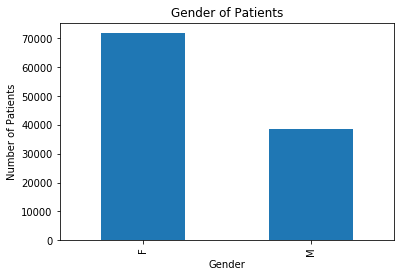

In [49]:
df['Gender'].value_counts().plot.bar()
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.title('Gender of Patients');

Number of female patients almost double that of our male patients.

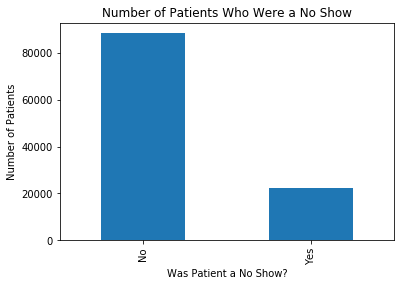

In [50]:
df['No_show'].value_counts().plot.bar()
plt.xlabel('Was Patient a No Show?')
plt.ylabel("Number of Patients")
plt.title('Number of Patients Who Were a No Show');

Looks like most of our patients show up for their appointments, but still plenty of no shows to work with.

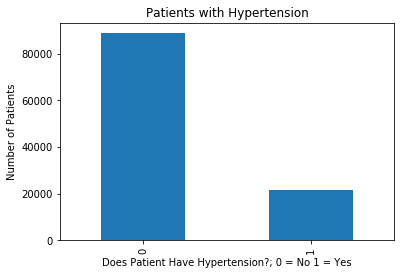

In [51]:
df['Hipertension'].value_counts().plot.bar()
plt.xlabel('Does Patient Have Hypertension?; 0 = No 1 = Yes')
plt.ylabel("Number of Patients")
plt.title('Patients with Hypertension');

A noticeable amount of patients have hypertension.

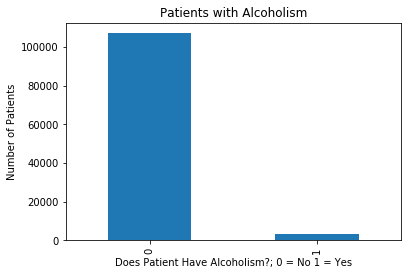

In [52]:
df['Alcoholism'].value_counts().plot.bar()
plt.xlabel('Does Patient Have Alcoholism?; 0 = No 1 = Yes')
plt.ylabel("Number of Patients")
plt.title('Patients with Alcoholism');

Not very many patients are alcoholics.

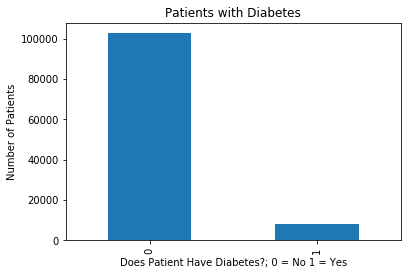

In [53]:
df['Diabetes'].value_counts().plot.bar()
plt.xlabel('Does Patient Have Diabetes?; 0 = No 1 = Yes')
plt.ylabel("Number of Patients")
plt.title('Patients with Diabetes');

Diabetes looks to affect patients at a rate somewhere in the middle of Alcoholism and Hypertension



### Research Question 1: Does a patient's age or gender determine if they will no show to their appointment?

In [54]:
df.Age[df.No_show=='No'].mean()

37.790064393252315

In [55]:
df.Age[df.No_show=='Yes'].mean()

34.31766656212196

Here, my first step is to see how the patients' age affects their ability to show up for their appointment. Older patients show up for their appointments more often than younger patients on average.

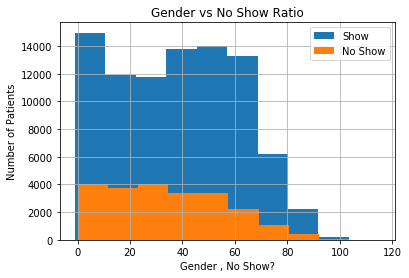

In [56]:
df.Age[df.No_show=='No'].hist(label='Show')
df.Age[df.No_show=='Yes'].hist(label='No Show')
plt.xlabel("Gender , No Show?")
plt.ylabel("Number of Patients")
plt.title('Gender vs No Show Ratio')
plt.legend();

Here is a visual representation of how the patients' ages correlate to them showing up to an appointment or not. Seeing this histogram makes it even easier to see how much of a factor age plays in this investigation. It would seem after a patient hits age 60 or so, their ability to make their appointments decreases.

/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


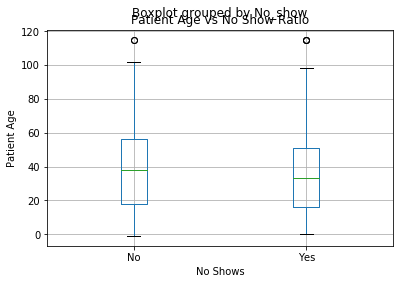

In [57]:
df.boxplot(column=['Age'], by = ['No_show'])
plt.xlabel("No Shows")
plt.ylabel("Patient Age")
plt.title("Patient Age vs No Show Ratio");

By creating this bivariate box plot, we can further visualize the correlation between a patient's age and their no show ratio.

Gender  No_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

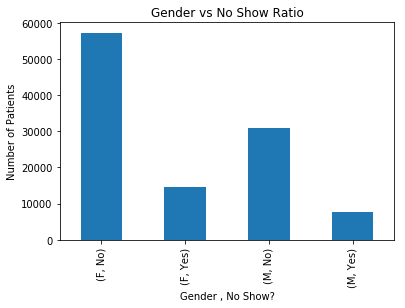

In [58]:
df.groupby('Gender')['No_show'].value_counts().plot(kind='bar')
plt.xlabel("Gender , No Show?")
plt.ylabel("Number of Patients")
plt.title('Gender vs No Show Ratio')
df.groupby('Gender')['No_show'].value_counts()

Above we see male and female separated and then split further showing the breakdown and how many total of each gender no shows.

In [59]:
female_yes = 14594
male_yes =7725
female_no = 57246
male_no = 30962
def gender_noshow(gender_yes, gender_no):
    total =gender_yes/(gender_yes + gender_no) * 100
    return round(total, 1)

Variables created from the data above and then a function to follow that allows us to easily calculate the percentage of each gender's no-show ratio.

In [60]:
gender_noshow(gender_yes= female_yes , gender_no = female_no)

20.3

The percentage of females that no show to their appointments

In [61]:
gender_noshow(gender_yes= male_yes , gender_no = male_no)

20.0

The percentage of males that no show to their appointments

###### We can see here that both female and male no show ratios are almost the same. This data shows us that gender does not have an effect on whether or not a patient shows up for their appointment.

### Research Question 2  How does a preexisting condition affect showing up to an appointment?

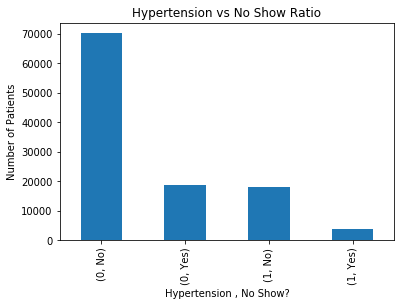

In [62]:
df.groupby('Hipertension')['No_show'].value_counts().plot(kind='bar')
plt.xlabel("Hypertension , No Show?")
plt.ylabel("Number of Patients")
plt.title('Hypertension vs No Show Ratio');

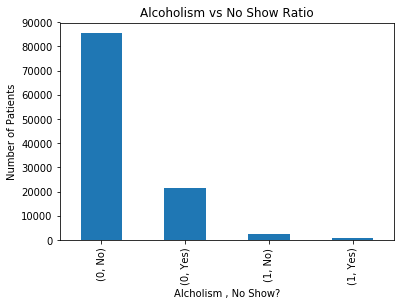

In [63]:
df.groupby('Alcoholism')['No_show'].value_counts().plot(kind='bar')
plt.xlabel("Alcholism , No Show?")
plt.ylabel("Number of Patients")
plt.title('Alcoholism vs No Show Ratio');

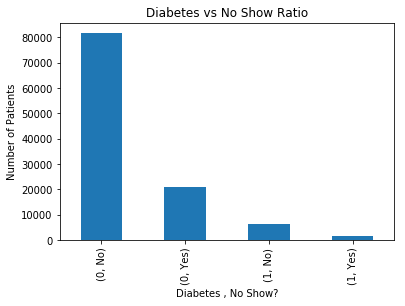

In [64]:
df.groupby('Diabetes')['No_show'].value_counts().plot(kind='bar')
plt.xlabel("Diabetes , No Show?")
plt.ylabel("Number of Patients")
plt.title('Diabetes vs No Show Ratio');

Here we can see the box plots of each of the prexisting conditions: Hypertension, Alcoholism, and Diabetes. Diabetes and Alcoholism have very similar rations while Hypertension's ratio varies greatly from the former two.

In [65]:
df.query('Hipertension == 1 or Diabetes == 1 or Alcoholism == 1 and No_show == "Yes"')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
25,M,2016-04-26T15:04:17Z,2016-04-29T00:00:00Z,46,CONQUISTA,0,1,0,0,0,1,No
26,F,2016-04-29T14:19:42Z,2016-04-29T00:00:00Z,45,BENTO FERREIRA,0,1,0,0,0,0,No
32,M,2016-04-29T07:30:27Z,2016-04-29T00:00:00Z,61,SÃO CRISTÓVÃO,0,1,0,0,0,0,No
34,F,2016-04-29T07:34:30Z,2016-04-29T00:00:00Z,79,SÃO CRISTÓVÃO,0,1,0,0,0,0,No
36,F,2016-04-29T07:35:19Z,2016-04-29T00:00:00Z,63,SÃO CRISTÓVÃO,0,1,1,0,0,0,No
37,F,2016-04-29T07:35:56Z,2016-04-29T00:00:00Z,64,TABUAZEIRO,1,1,1,0,0,0,No
38,M,2016-04-20T15:54:18Z,2016-04-29T00:00:00Z,85,SÃO CRISTÓVÃO,0,1,0,0,0,1,No


Here we have queried all the no shows that have at least one ailment: Hipertension, Diabetes, or Alcoholism. 

We can see that 23,678 patients match this criteria and since we know our data set has 110,527 patients, we can do a simple calculation to see the % of no shows for any preexisting condition.

In [66]:
round(23678/patients*100, 2)

21.42

In [67]:
round(no_show_total/patients * 100, 2)

20.19

Here we see that prexisting conditions and total patient to no show ratio is strangely similar. Having a ~1% difference between the two does have some impact, but not as large as I would think as having a chronic condition would seemingly affect your ability to travel outside your home.

<a id='conclusions'></a>
## Conclusions
The findings I have concluded are quite simple. There are many factors that can affect a patient's ability to make their appointments and some that do not. Evidented by the data above, it would seem that Age and certain preexisting conditions with restrict patients from making it to their appointment. This would make sense from a practical stand point as the older you get and the more restricted by your ailments you become, the more reliant you are on external forces to get to your appointments. Since I am American and this data is pulled from Brazil, there could be many factors that change based on region that would return different data under the same parameters if it were to take place here in the United States. How much does a person work in Brazil? What is their traditional family relationship like? What are the facilties and overall infrastructure like? All these questions can have an impact on our data even when looking at the same parameter but in a different part of the world. Overall I would say that my findings were overall predictable and make sense, outside of the fact that alcoholism does not have an impact on their appointment punctuality.



### Limitation
A limitation of mine would be that I should have removed the Neighbourhood column and focused more on a smaller set of parameters. Although it would be good to see who is going to more appointments from certain neighborhoods, it would take a more personal or indepth approach as there could be countless reasons why a certain neighborhood would allow for more no shows and would not be relevant to the type of investigation I committed to. There are endless ways to compare this data, but I think it was important to pick a few categories that I deemed the most important as too much analysis might lead to confusion on both mine and the readers part.



## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> **_Your question_**

In [68]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0